In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import sys
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format='retina'

In [10]:
mobilenet= pd.read_csv('unet_mobileNet.csv', header=None)
# get digits in each cell
mobilenet.columns = ['epoch', 'train_loss', 'train_acc', 'test_loss', 'test_acc']
mobilenet['epoch'] = mobilenet['epoch'].apply(lambda x: re.findall(r'\d+', x)[0])
mobilenet['train_loss'] = mobilenet['train_loss'].apply(lambda x: re.findall(r'\d+\.\d+', x)[0])
mobilenet['train_acc'] = mobilenet['train_acc'].apply(lambda x: re.findall(r'\d+\.\d+', x)[0])
mobilenet['test_loss'] = mobilenet['test_loss'].apply(lambda x: re.findall(r'\d+\.\d+', x)[0])
mobilenet['test_acc'] = mobilenet['test_acc'].apply(lambda x: re.findall(r'\d+\.\d+', x)[0])
mobilenet['epoch'] = mobilenet['epoch'].astype(int)
mobilenet['train_loss'] = mobilenet['train_loss'].astype(float)
mobilenet['train_acc'] = mobilenet['train_acc'].astype(float)
mobilenet['test_loss'] = mobilenet['test_loss'].astype(float)
mobilenet['test_acc'] = mobilenet['test_acc'].astype(float)
mobilenet.head()


,epoch,train_loss,train_acc,test_loss,test_acc
0,1,1.7683,0.3296,2.1071,0.2367
1,2,1.5482,0.4267,2.0478,0.3681
2,3,1.4657,0.4664,1.5436,0.4461
3,4,1.4351,0.4767,1.7409,0.3911
4,5,1.4071,0.4871,1.3712,0.5000


In [11]:
mobilenet.test_loss.describe()

# set the outlier to the min
mobilenet.test_loss = mobilenet.test_loss.apply(lambda x: 0.58 if x > 8 else x)
mobilenet.test_loss.describe()

count    200.000000
mean       0.877826
std        0.402720
min        0.577000
25%        0.667200
50%        0.742450
75%        0.894525
max        3.244200
Name: test_loss, dtype: float64

In [12]:
vgg= pd.read_csv('unet_vgg16.csv', header=None)
# get digits in each cell
vgg.columns = ['epoch', 'train_loss', 'train_acc', 'test_loss', 'test_acc']
vgg['epoch'] = vgg['epoch'].apply(lambda x: re.findall(r'\d+', x)[0])
vgg['train_loss'] = vgg['train_loss'].apply(lambda x: re.findall(r'\d+\.\d+', x)[0])
vgg['train_acc'] = vgg['train_acc'].apply(lambda x: re.findall(r'\d+\.\d+', x)[0])
vgg['test_loss'] = vgg['test_loss'].apply(lambda x: re.findall(r'\d+\.\d+', x)[0])
vgg['test_acc'] = vgg['test_acc'].apply(lambda x: re.findall(r'\d+\.\d+', x)[0])
vgg['epoch'] = vgg['epoch'].astype(int)
vgg['train_loss'] = vgg['train_loss'].astype(float)
vgg['train_acc'] = vgg['train_acc'].astype(float)
vgg['test_loss'] = vgg['test_loss'].astype(float)
vgg['test_acc'] = vgg['test_acc'].astype(float)
vgg.head()


,epoch,train_loss,train_acc,test_loss,test_acc
0,1,2.0651,0.1980,1.8895,0.2341
1,2,1.6476,0.3668,1.3698,0.4872
2,3,1.3697,0.4968,1.1837,0.5623
3,4,1.1515,0.5835,0.9715,0.6455
4,5,1.0042,0.6444,0.9004,0.6852


In [13]:
vit= pd.read_csv('vit.csv', header=None)
# get digits in each cell
vit.columns = ['epoch', 'train_loss', 'train_acc', 'test_loss', 'test_acc']
vit['epoch'] = vit['epoch'].apply(lambda x: re.findall(r'\d+', x)[0])
vit['train_loss'] = vit['train_loss'].apply(lambda x: re.findall(r'\d+\.\d+', x)[0])
vit['train_acc'] = vit['train_acc'].apply(lambda x: re.findall(r'\d+\.\d+', x)[0])
vit['test_loss'] = vit['test_loss'].apply(lambda x: re.findall(r'\d+\.\d+', x)[0])
vit['test_acc'] = vit['test_acc'].apply(lambda x: re.findall(r'\d+\.\d+', x)[0])
vit['epoch'] = vit['epoch'].astype(int)
vit['train_loss'] = vit['train_loss'].astype(float)
vit['train_acc'] = vit['train_acc'].astype(float)
vit['test_loss'] = vit['test_loss'].astype(float)
vit['test_acc'] = vit['test_acc'].astype(float)
vit.head()


,epoch,train_loss,train_acc,test_loss,test_acc
0,1,1.9365,0.2649,1.6988,0.3578
1,2,1.6570,0.3889,1.4528,0.4726
2,3,1.4921,0.4515,1.3813,0.4967
3,4,1.4101,0.4834,1.3017,0.5202
4,5,1.3583,0.5089,1.2349,0.5513


In [14]:
resnet= pd.read_csv('unet_resnet18_100epochs.csv', header=None)
# get digits in each cell
resnet.columns = ['epoch', 'train_loss', 'train_acc', 'test_loss', 'test_acc']
resnet['epoch'] = resnet['epoch'].apply(lambda x: re.findall(r'\d+', x)[0])
resnet['train_loss'] = resnet['train_loss'].apply(lambda x: re.findall(r'\d+\.\d+', x)[0])
resnet['train_acc'] = resnet['train_acc'].apply(lambda x: re.findall(r'\d+\.\d+', x)[0])
resnet['test_loss'] = resnet['test_loss'].apply(lambda x: re.findall(r'\d+\.\d+', x)[0])
resnet['test_acc'] = resnet['test_acc'].apply(lambda x: re.findall(r'\d+\.\d+', x)[0])
resnet['epoch'] = resnet['epoch'].astype(int)
resnet['train_loss'] = resnet['train_loss'].astype(float)
resnet['train_acc'] = resnet['train_acc'].astype(float)
resnet['test_loss'] = resnet['test_loss'].astype(float)
resnet['test_acc'] = resnet['test_acc'].astype(float)
resnet.head()

,epoch,train_loss,train_acc,test_loss,test_acc
0,1,2.3427,0.2294,1.7524,0.3252
1,2,1.7828,0.3384,1.5765,0.4192
2,3,1.6583,0.3947,1.4240,0.4798
3,4,1.5200,0.4510,1.2906,0.5320
4,5,1.3762,0.5071,1.0479,0.6318


In [15]:
# print minimum train and test loss of each model
print('MobileNet: train loss: {}, test loss: {}'.format(mobilenet.train_loss.min(), mobilenet.test_loss.min()))
print('VGG16: train loss: {}, test loss: {}'.format(vgg.train_loss.min(), vgg.test_loss.min()))
print('ResNet18: train loss: {}, test loss: {}'.format(resnet.train_loss.min(), resnet.test_loss.min()))
print('ViT: train loss: {}, test loss: {}'.format(vit.train_loss.min(), vit.test_loss.min()))
print("="*50)
# print the maximum train and test accuracy of each model
print('MobileNet: train acc: {}, test acc: {}'.format(mobilenet.train_acc.max(), mobilenet.test_acc.max()))
print('VGG16: train acc: {}, test acc: {}'.format(vgg.train_acc.max(), vgg.test_acc.max()))
print('ResNet18: train acc: {}, test acc: {}'.format(resnet.train_acc.max(), resnet.test_acc.max()))
print('ViT: train acc: {}, test acc: {}'.format(vit.train_acc.max(), vit.test_acc.max()))


MobileNet: train loss: 0.4767, test loss: 0.577
VGG16: train loss: 0.0577, test loss: 0.3646
ResNet18: train loss: 0.4154, test loss: 0.2648
ViT: train loss: 0.7598, test loss: 0.6904
MobileNet: train acc: 0.8346, test acc: 0.806
VGG16: train acc: 0.981, test acc: 0.9012
ResNet18: train acc: 0.8568, test acc: 0.9119
ViT: train acc: 0.7316, test acc: 0.7628


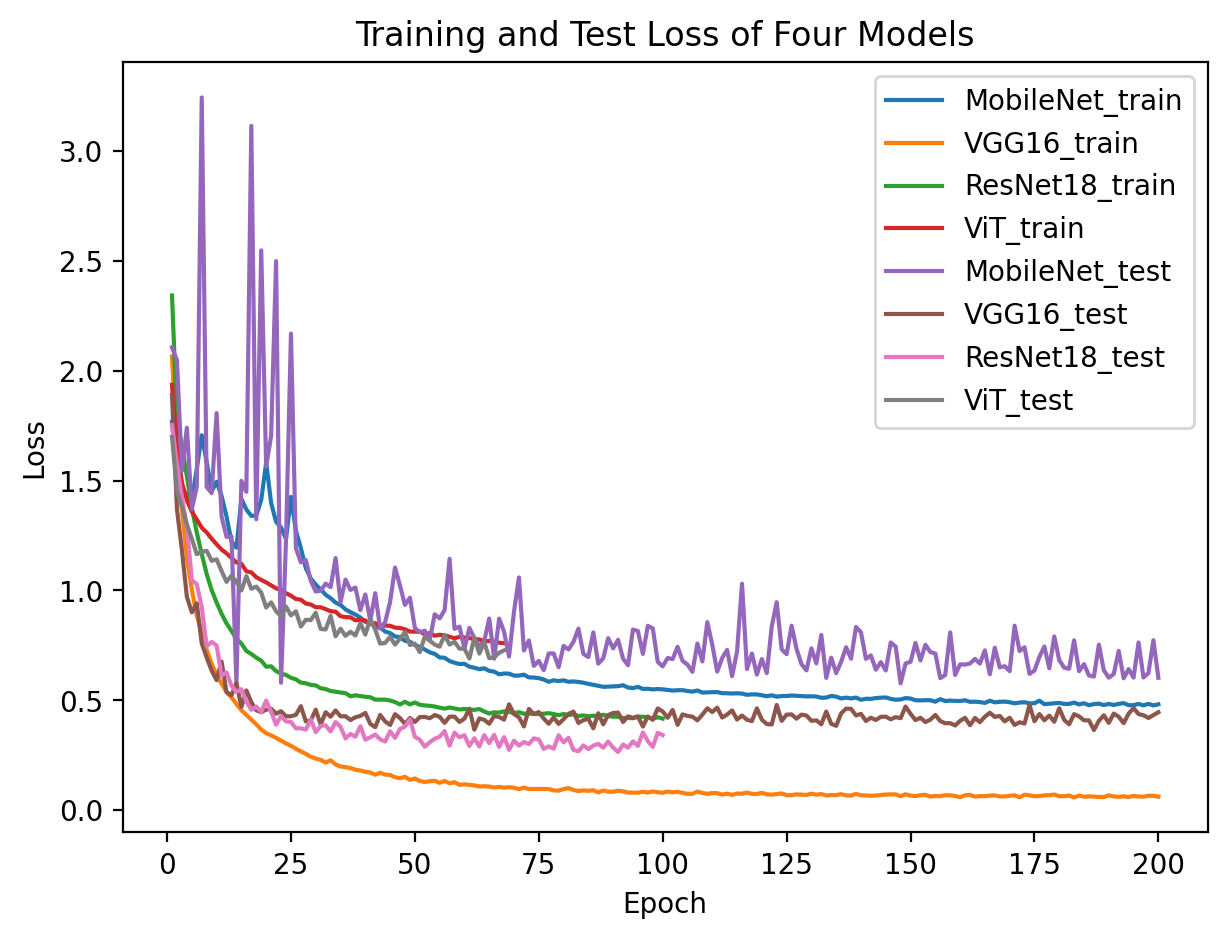

In [20]:
# Plot training and test loss of three models 
plt.figure(figsize=(7, 5), dpi=100)
plt.plot(mobilenet['epoch'], mobilenet['train_loss'], label='MobileNet_train')
plt.plot(vgg['epoch'], vgg['train_loss'], label='VGG16_train')
plt.plot(resnet['epoch'], resnet['train_loss'], label='ResNet18_train')
plt.plot(vit['epoch'], vit['train_loss'], label='ViT_train')
plt.plot(mobilenet['epoch'], mobilenet['test_loss'], label='MobileNet_test')
plt.plot(vgg['epoch'], vgg['test_loss'], label='VGG16_test')
plt.plot(resnet['epoch'], resnet['test_loss'], label='ResNet18_test')
plt.plot(vit['epoch'], vit['test_loss'], label='ViT_test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss of Four Models')
plt.legend()
plt.show()

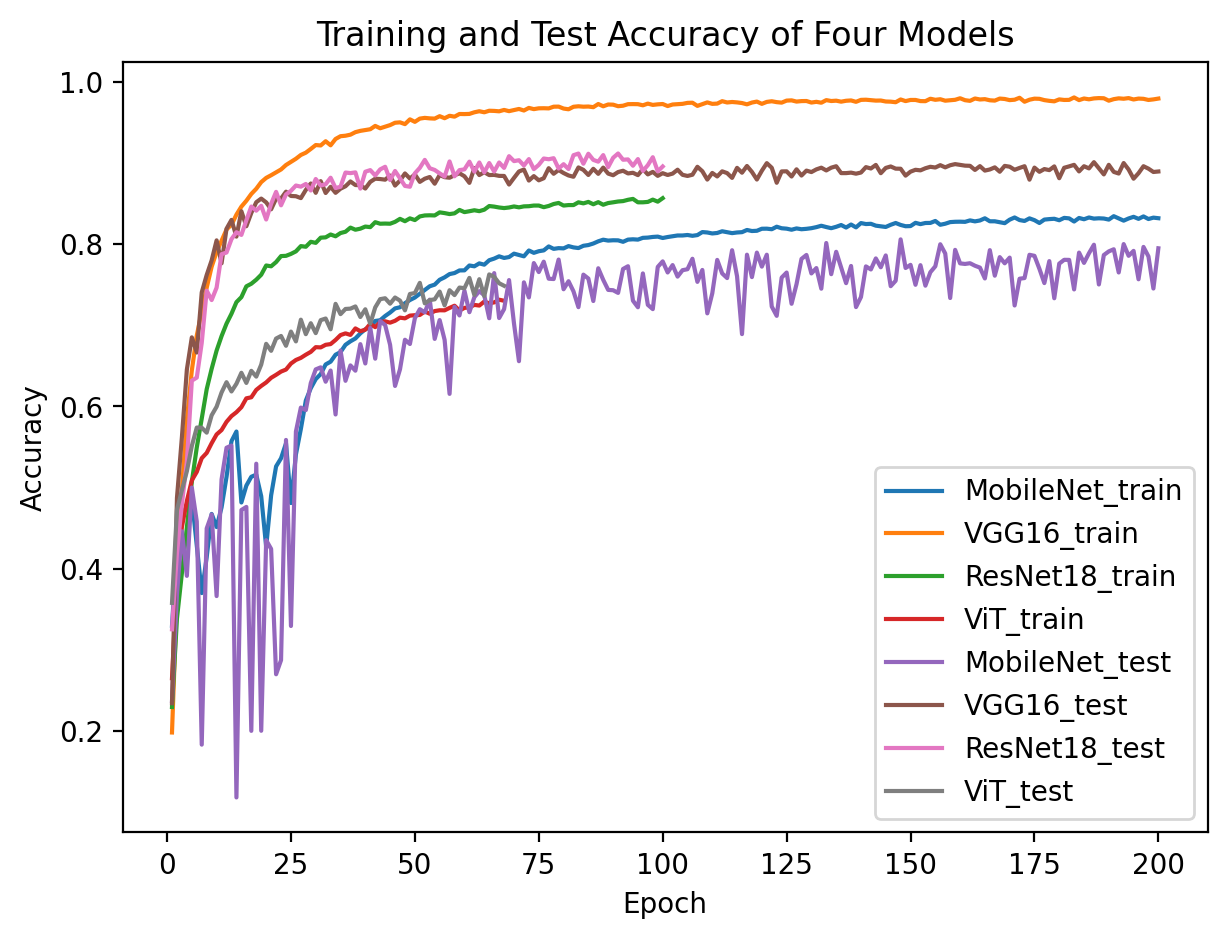

In [21]:
# plot training and test accuracy of three models 
plt.figure(figsize=(7, 5), dpi=100)
plt.plot(mobilenet['epoch'], mobilenet['train_acc'], label='MobileNet_train')
plt.plot(vgg['epoch'], vgg['train_acc'], label='VGG16_train')
plt.plot(resnet['epoch'], resnet['train_acc'], label='ResNet18_train')
plt.plot(vit['epoch'], vit['train_acc'], label='ViT_train')
plt.plot(mobilenet['epoch'], mobilenet['test_acc'], label='MobileNet_test')
plt.plot(vgg['epoch'], vgg['test_acc'], label='VGG16_test')
plt.plot(resnet['epoch'], resnet['test_acc'], label='ResNet18_test')
plt.plot(vit['epoch'], vit['test_acc'], label='ViT_test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy of Four Models')
plt.legend()
plt.show()


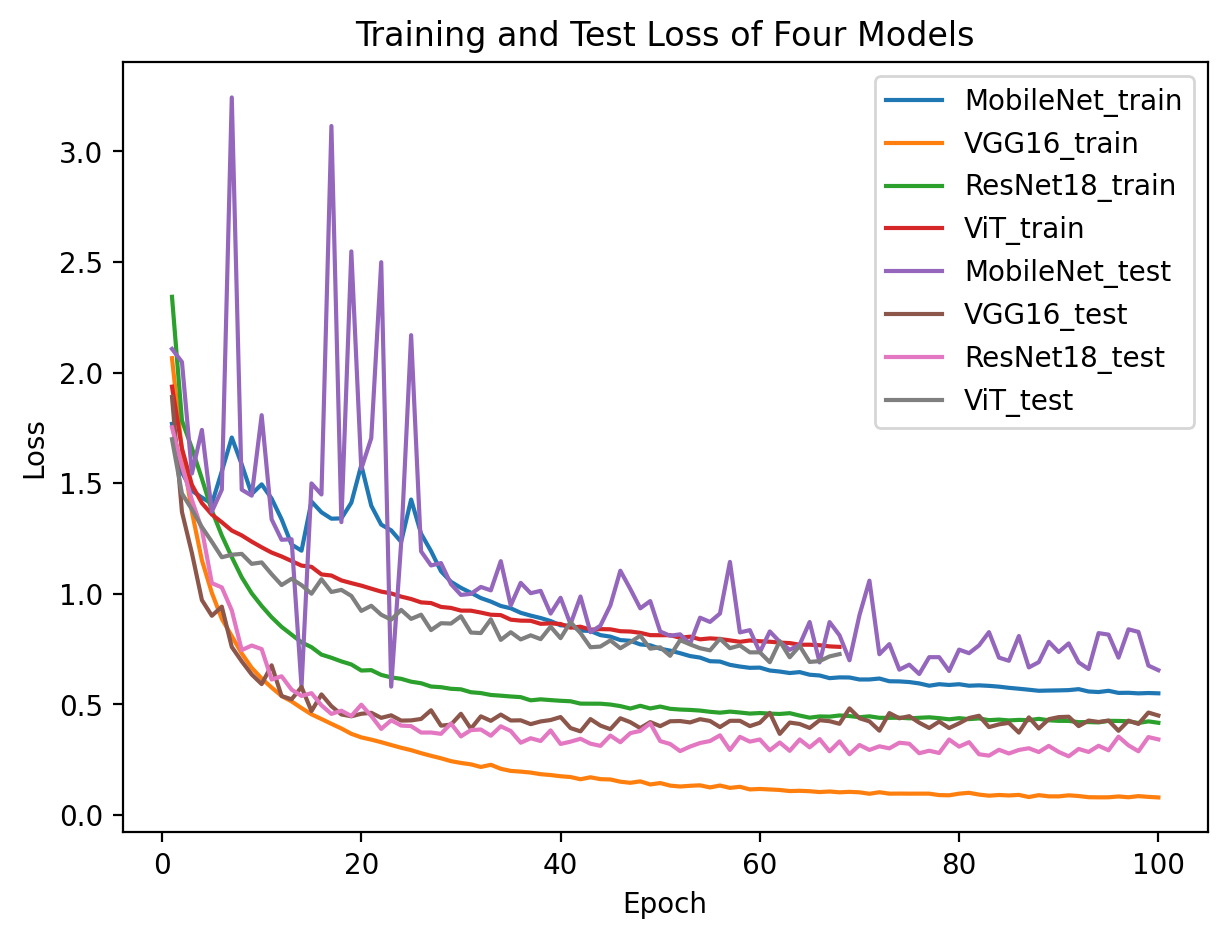

In [22]:
# only plot the first 100 epochs
plt.figure(figsize=(7, 5), dpi=100)
plt.plot(mobilenet['epoch'][:100], mobilenet['train_loss'][:100], label='MobileNet_train')
plt.plot(vgg['epoch'][:100], vgg['train_loss'][:100], label='VGG16_train')
plt.plot(resnet['epoch'][:100], resnet['train_loss'][:100], label='ResNet18_train')
plt.plot(vit['epoch'][:100], vit['train_loss'][:100], label='ViT_train')
plt.plot(mobilenet['epoch'][:100], mobilenet['test_loss'][:100], label='MobileNet_test')
plt.plot(vgg['epoch'][:100], vgg['test_loss'][:100], label='VGG16_test')
plt.plot(resnet['epoch'][:100], resnet['test_loss'][:100], label='ResNet18_test')
plt.plot(vit['epoch'][:100], vit['test_loss'][:100], label='ViT_test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss of Four Models')
plt.legend()
plt.show()


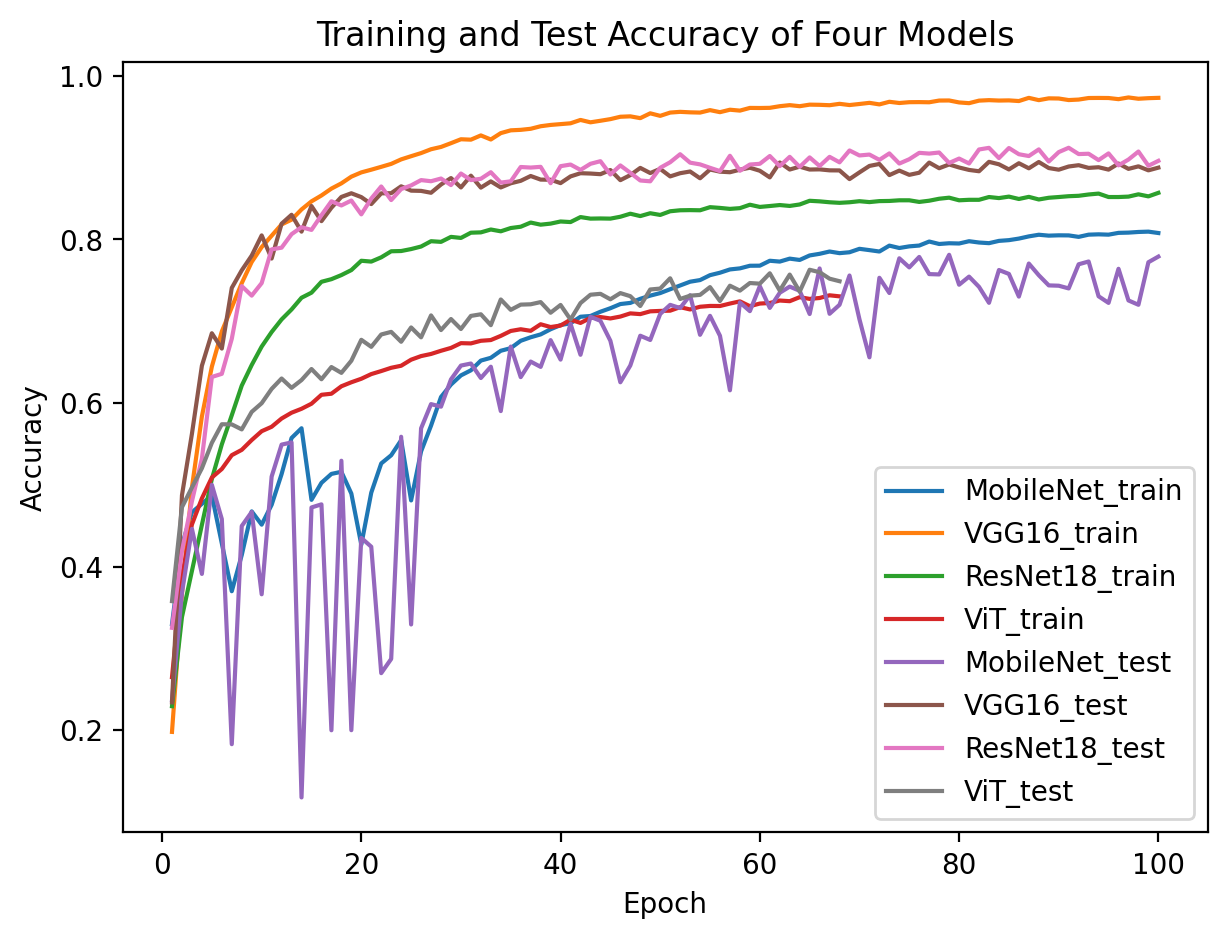

In [23]:
# only plot the first 100 epochs
plt.figure(figsize=(7, 5), dpi=100)
plt.plot(mobilenet['epoch'][:100], mobilenet['train_acc'][:100], label='MobileNet_train')
plt.plot(vgg['epoch'][:100], vgg['train_acc'][:100], label='VGG16_train')
plt.plot(resnet['epoch'][:100], resnet['train_acc'][:100], label='ResNet18_train')
plt.plot(vit['epoch'][:100], vit['train_acc'][:100], label='ViT_train')
plt.plot(mobilenet['epoch'][:100], mobilenet['test_acc'][:100], label='MobileNet_test')
plt.plot(vgg['epoch'][:100], vgg['test_acc'][:100], label='VGG16_test')
plt.plot(resnet['epoch'][:100], resnet['test_acc'][:100], label='ResNet18_test')
plt.plot(vit['epoch'][:100], vit['test_acc'][:100], label='ViT_test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy of Four Models')
plt.legend()
plt.show()


In [ ]:
def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit(epochs, model, train_loader, val_loader, criterion, optimizer, scheduler, patch=False):
    torch.cuda.empty_cache()
    train_losses = []
    test_losses = []
    val_iou = []; val_acc = []
    train_iou = []; train_acc = []
    lrs = []
    min_loss = np.inf
    decrease = 1 ; not_improve=0

    model.to(device)
    fit_time = time.time()
    for e in range(epochs):
        since = time.time()
        running_loss = 0
        iou_score = 0
        accuracy = 0
        #training loop
        model.train()
        for i, data in enumerate(tqdm(train_loader)):
            #training phase
            image_tiles, mask_tiles = data
            if patch:
                bs, n_tiles, c, h, w = image_tiles.size()

                image_tiles = image_tiles.view(-1,c, h, w)
                mask_tiles = mask_tiles.view(-1, h, w)
            
            image = image_tiles.to(device); mask = mask_tiles.to(device);
            #forward
            output = model(image)
            #print(mask)
            loss = criterion(output, mask)
            #evaluation metrics
            iou_score += mIoU(output, mask)
            accuracy += pixel_accuracy(output, mask)
            #backward
            loss.backward()
            optimizer.step() #update weight          
            optimizer.zero_grad() #reset gradient
            
            #step the learning rate
            lrs.append(get_lr(optimizer))
            scheduler.step() 
            
            running_loss += loss.item()
            
        else:
            model.eval()
            test_loss = 0
            test_accuracy = 0
            val_iou_score = 0
            #validation loop
            with torch.no_grad():
                for i, data in enumerate(tqdm(val_loader)):
                    #reshape to 9 patches from single image, delete batch size
                    image_tiles, mask_tiles = data

                    if patch:
                        bs, n_tiles, c, h, w = image_tiles.size()

                        image_tiles = image_tiles.view(-1,c, h, w)
                        mask_tiles = mask_tiles.view(-1, h, w)
                    
                    image = image_tiles.to(device); mask = mask_tiles.to(device);
                    output = model(image)
                    #evaluation metrics
                    val_iou_score +=  mIoU(output, mask)
                    test_accuracy += pixel_accuracy(output, mask)
                    #loss
                    #print(mask)
                    loss = criterion(output, mask)                                  
                    test_loss += loss.item()
            
            #calculatio mean for each batch
            train_losses.append(running_loss/len(train_loader))
            test_losses.append(test_loss/len(val_loader))


            if min_loss > (test_loss/len(val_loader)):
                print('Loss Decreasing.. {:.3f} >> {:.3f} '.format(min_loss, (test_loss/len(val_loader))))
                min_loss = (test_loss/len(val_loader))
                decrease += 1
                if decrease % 5 == 0:
                    print('saving model...')
                    torch.save(model, 'Unet-resnet18_mIoU-{:.3f}.pt'.format(val_iou_score/len(val_loader)))
                    

            if (test_loss/len(val_loader)) > min_loss:
                not_improve += 1
                min_loss = (test_loss/len(val_loader))
                print(f'Loss Not Decrease for {not_improve} time')
                # if not_improve == 7:
                #     print('Loss not decrease for 7 times, Stop Training')
                #     break
            
            #iou
            val_iou.append(val_iou_score/len(val_loader))
            train_iou.append(iou_score/len(train_loader))
            train_acc.append(accuracy/len(train_loader))
            val_acc.append(test_accuracy/ len(val_loader))
            print("Epoch:{}/{}..".format(e+1, epochs),
                  "Train Loss: {:.3f}..".format(running_loss/len(train_loader)),
                  "Val Loss: {:.3f}..".format(test_loss/len(val_loader)),
                  "Train mIoU:{:.3f}..".format(iou_score/len(train_loader)),
                  "Val mIoU: {:.3f}..".format(val_iou_score/len(val_loader)),
                  "Train Acc:{:.3f}..".format(accuracy/len(train_loader)),
                  "Val Acc:{:.3f}..".format(test_accuracy/len(val_loader)),
                  "Time: {:.2f}m".format((time.time()-since)/60))
        # save model when epoch is 10, 20, 30, 40, 50
        if e % 10 == 0:
            torch.save(model,"/content/drive/Unet-vgg16_2.pt")
        
    history = {'train_loss' : train_losses, 'val_loss': test_losses,
               'train_miou' :train_iou, 'val_miou':val_iou,
               'train_acc' :train_acc, 'val_acc':val_acc,
               'lrs': lrs}
    print('Total time: {:.2f} m' .format((time.time()- fit_time)/60))
    return history